In [1]:
# set up jupyter
from IPython.display import display, Markdown # pretty display
from IPython.core.interactiveshell import InteractiveShell # multi output

InteractiveShell.ast_node_interactivity = "all" # type: ignore

In [2]:
# import packages
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils.plotter import Plotter # type: ignore

In [10]:
# get preprocessed data
data = pd.read_csv("./dataset/preprocessed.csv") # type: ignore
Markdown("# Preprocessed data")
display(data)
data["Attrition"].value_counts()

# Preprocessed data

,Age,MonthlyIncome,OverTime,DistanceFromHome,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Attrition
0,0.547619,0.262454,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.217009,0.0,0.250000,0.0,1.0,0.0,0.0,0.0,0.0
2,0.452381,0.056925,1.0,0.035714,1.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.100053,1.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
4,0.214286,0.129489,0.0,0.035714,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.082254,0.0,0.785714,0.0,1.0,0.0,0.0,0.0,0.0
1466,0.500000,0.472986,0.0,0.178571,0.0,0.0,1.0,0.0,0.0,0.0
1467,0.214286,0.270300,1.0,0.107143,0.0,1.0,0.0,0.0,0.0,0.0
1468,0.738095,0.230700,0.0,0.035714,0.0,1.0,0.0,0.0,0.0,0.0


Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

In [4]:
# prep data
labels = data["Attrition"]
features = data .drop("Attrition", axis = 1)

# splits
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [5]:
# create plotter for test results
plotter = Plotter(y_test)

In [6]:
# dataset is very imbalanced, oversample to address this
oversampler = SMOTE(random_state=0)
smote_x, smote_y = oversampler.fit_resample(x_train, y_train) # type: ignore

# Results: Decision Tree

[[245  65]
 [ 31  27]]
Accuracy:  0.7391304347826086
Precision:  0.29347826086956524
Recall:  0.46551724137931033


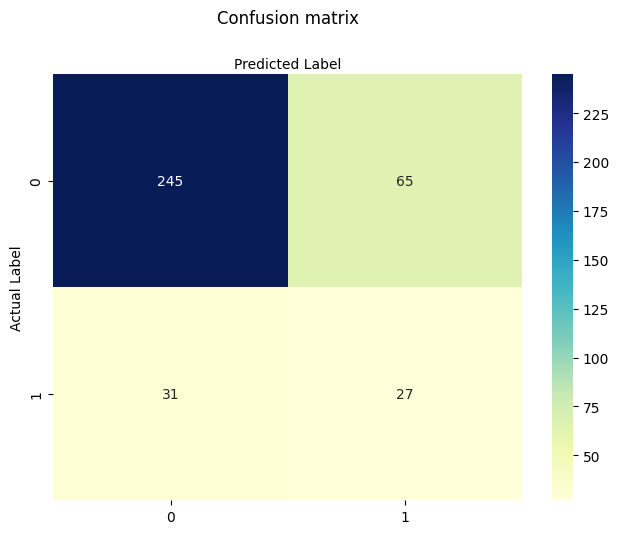

In [7]:
# train and test decision tree
dtc = DecisionTreeClassifier().fit(smote_x, smote_y)
dtc_pred = dtc.predict(x_test)
Markdown("# Results: Decision Tree")
plotter(dtc_pred)

# Results: Random Forest

[[270  40]
 [ 32  26]]
Accuracy:  0.8043478260869565
Precision:  0.3939393939393939
Recall:  0.4482758620689655


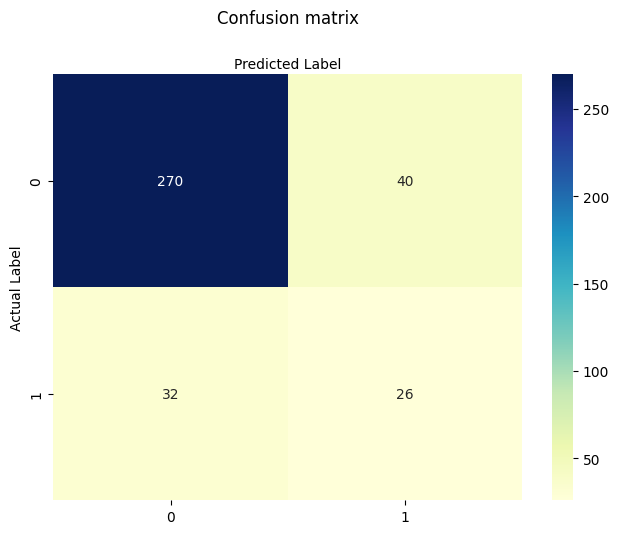

In [8]:
# train and test random forest
rfc = RandomForestClassifier().fit(smote_x, smote_y)
rfc_pred = rfc.predict(x_test)
Markdown("# Results: Random Forest")
plotter(rfc_pred)

# Results: Gradient Boosting

[[267  43]
 [ 33  25]]
Accuracy:  0.7934782608695652
Precision:  0.36764705882352944
Recall:  0.43103448275862066


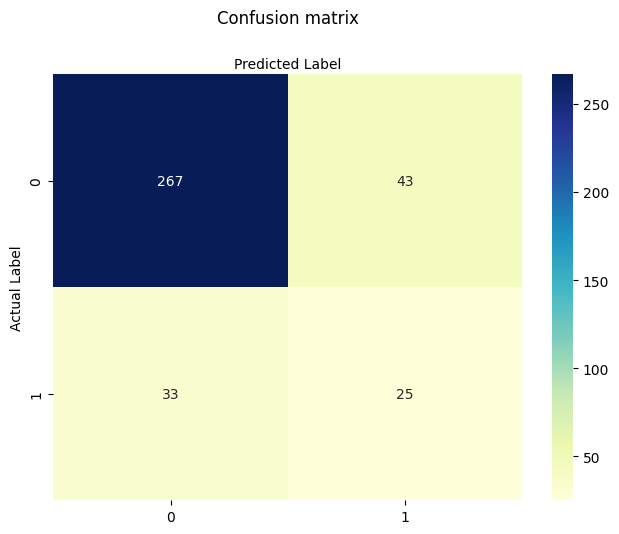

In [9]:
# train and test gradient boosting
gbc = GradientBoostingClassifier().fit(smote_x, smote_y)
gbc_pred = gbc.predict(x_test)
Markdown("# Results: Gradient Boosting")
plotter(gbc_pred)